**Hierarchical** **Clustering**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
from google.colab import files
f = files.upload()

In [24]:
dataset = pd.read_csv('Mall_Customers.csv')


In [25]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
X = dataset.iloc[:,[3,4]].values

In [27]:
import scipy.cluster.hierarchy as sch

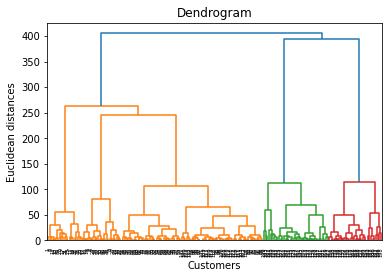

In [28]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [30]:
y_hc = hc.fit_predict(X)

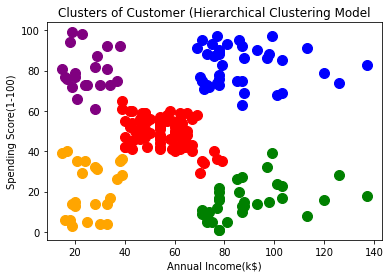

In [31]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Spending => careful
<br> Red: Normal Income vs Normal Spending => Standard
<br> Blue: High Income vs High Spending => Target
<br> Purple: Low Income vs High Spending => careless
<br> Orange: Low Income vs Low Spending => Sensible

#Text analysis using topic modelling

In [66]:
papers  = pd.read_csv('papers.csv')

In [67]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [70]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text,paper_text_processed
1707,2004,An Auditory Paradigm for Brain-Computer Interf...,Abstract Missing,An Auditory Paradigm for\nBrain?Computer Inter...,an auditory paradigm for\nbraincomputer interf...
5810,2016,Joint Line Segmentation and Transcription for ...,Offline handwriting recognition systems requir...,Joint Line Segmentation and Transcription for\...,joint line segmentation and transcription for\...
1734,2004,Object Classification from a Single Example Ut...,Abstract Missing,Object Classification from a Single Example\nU...,object classification from a single example\nu...
1879,2004,Making Latin Manuscripts Searchable using gHMM's,Abstract Missing,Making Latin Manuscripts Searchable using\ngHM...,making latin manuscripts searchable using\nghm...
2974,2009,Boosting with Spatial Regularization,By adding a spatial regularization kernel to a...,Boosting with Spatial Regularization\n\nZhen J...,boosting with spatial regularization\n\nzhen j...


In [68]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))


In [69]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

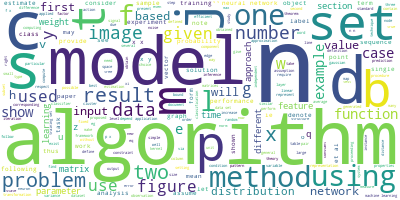

In [71]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [72]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [73]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [74]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))


In [75]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['auditory', 'paradigm', 'braincomputer', 'interfaces', 'jeremy', 'hill', 'navin', 'lal', 'karin', 'bierig', 'niels', 'birbaumer', 'bernhard', 'sch', 'olkopf', 'max', 'planck', 'institute', 'biological', 'cybernetics', 'spemannstrae', 'ubingen', 'germany', 'jez', 'navin', 'bierig', 'bs', 'tuebingenmpgde', 'institute', 'medical']


In [76]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 4), (19, 1), (20, 1), (21, 3), (22, 3), (23, 1), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1)]


In [77]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"data" + 0.006*"algorithm" + 0.006*"learning" + 0.005*"model" + '
  '0.005*"set" + 0.003*"using" + 0.003*"problem" + 0.003*"number" + '
  '0.003*"one" + 0.003*"first"'),
 (1,
  '0.007*"learning" + 0.005*"algorithm" + 0.004*"model" + 0.004*"using" + '
  '0.004*"two" + 0.004*"set" + 0.004*"function" + 0.003*"problem" + '
  '0.003*"data" + 0.003*"figure"'),
 (2,
  '0.005*"data" + 0.005*"set" + 0.005*"model" + 0.005*"learning" + '
  '0.004*"algorithm" + 0.004*"matrix" + 0.003*"one" + 0.003*"neural" + '
  '0.003*"function" + 0.003*"using"'),
 (3,
  '0.007*"learning" + 0.006*"algorithm" + 0.005*"set" + 0.004*"model" + '
  '0.004*"two" + 0.004*"data" + 0.004*"function" + 0.004*"matrix" + '
  '0.004*"number" + 0.004*"one"'),
 (4,
  '0.006*"algorithm" + 0.006*"data" + 0.005*"set" + 0.004*"one" + '
  '0.004*"model" + 0.004*"time" + 0.004*"figure" + 0.003*"function" + '
  '0.003*"learning" + 0.003*"results"'),
 (5,
  '0.007*"data" + 0.005*"set" + 0.005*"function" + 0.005*"learning" 

In [78]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=13febc456d724541ae8562919482abb4a01603fc5c5b1b83050f0e5f174b6d23
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e0fcf25f478483431f19afa542e12eb4f73cbf998b4514412bba1a73082e02f7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [79]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [82]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.002442 -0.002887       1        1  17.140726
4     -0.005034 -0.009549       2        1  13.706237
9     -0.000234 -0.000291       3        1  12.424750
2      0.003589 -0.001914       4        1  11.356005
3      0.000065  0.004114       5        1  10.846348
7     -0.002251 -0.000821       6        1   8.531446
8     -0.001264 -0.002585       7        1   7.844615
1      0.009330  0.001441       8        1   7.775240
0     -0.010251  0.007079       9        1   6.734520
6      0.003607  0.005412      10        1   3.640114, topic_info=           Term         Freq        Total Category  logprob  loglift
486    learning  1307.000000  1307.000000  Default  30.0000  30.0000
1419      model   998.000000   998.000000  Default  29.0000  29.0000
916         two   807.000000   807.000000  Default  28.0000  28.0000
938       using   853.000000   853.000000  Default  27.0000  27.0000
20    algorithm  1305.000000  1305.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
608         one    25.344615   855.445361  Topic10  -5.8709  -0.2059
1421     models    20.013857   610.047814  Topic10  -6.1070  -0.1040
325      figure    20.766319   754.221781  Topic10  -6.0701  -0.2792
675     problem    20.007015   761.194411  Topic10  -6.1074  -0.3257
593      number    19.025532   729.987632  Topic10  -6.1577  -0.3341

[877 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
3728       1  0.116698  abernethy
3728       2  0.116698  abernethy
3728       3  0.116698  abernethy
3728       4  0.116698  abernethy
3728       5  0.116698  abernethy
...      ...       ...        ...
15172      8  0.183556      zonal
5577       3  0.222278    zoracle
5577       5  0.222278    zoracle
5577       7  0.222278    zoracle
5577       8  0.222278    zoracle

[4205 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 10, 3, 4, 8, 9, 2, 1, 7])